In [25]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(handypandy)


Attaching package: ‘handypandy’

The following objects are masked from ‘package:lubridate’:

    dmy, mdy, ymd



In [2]:
data <- read.csv("../../../io/data/train.csv")

In [3]:
df <- data %>%
    arrange(secs) %>%
    mutate(secs = ymd_hms(secs))

In [4]:
names(df)

[1] "p.unit.serial.number"  "s.barometer"           "s.co2"                
 [4] "s.humidity"            "s.no2resistance"       "s.o3resistance"       
 [7] "s.temperature.ambient" "s.temperature.unit"    "secs"                 
[10] "O3_Waarden"            "NO2_Waarden"           "CO_Waarden"

# General

In [5]:
summary(df)
dim(df)

 p.unit.serial.number  s.barometer         s.co2        s.humidity    
 Min.   :12.00        Min.   : 973.7   Min.   :   0   Min.   : 11.06  
 1st Qu.:12.00        1st Qu.:1004.6   1st Qu.: 961   1st Qu.: 59.57  
 Median :12.00        Median :1009.0   Median :1006   Median : 69.74  
 Mean   :12.82        Mean   :1009.6   Mean   :1009   Mean   : 68.74  
 3rd Qu.:14.00        3rd Qu.:1014.7   3rd Qu.:1125   3rd Qu.: 78.13  
 Max.   :14.00        Max.   :1031.9   Max.   :6382   Max.   :124.47  
                                                                      
 s.no2resistance  s.o3resistance    s.temperature.ambient s.temperature.unit
 Min.   :   0.0   Min.   :   0.00   Min.   :-4.187        Min.   : 0.312    
 1st Qu.: 530.1   1st Qu.:  37.10   1st Qu.: 5.625        1st Qu.:19.250    
 Median : 737.7   Median :  62.73   Median :11.937        Median :26.125    
 Mean   : 785.8   Mean   :  84.44   Mean   :11.749        Mean   :25.799    
 3rd Qu.: 964.7   3rd Qu.: 115.53   3rd Qu.:16.

[1] 542679     12

# Tijd

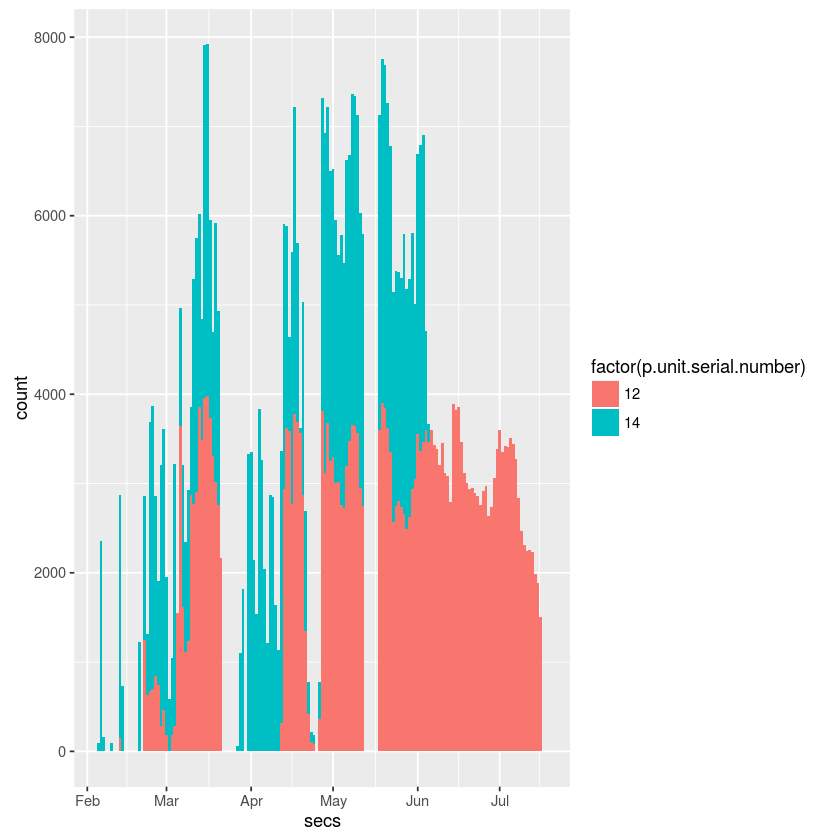

In [37]:
ggplot(df, aes(secs, fill = factor(p.unit.serial.number))) + 
geom_histogram(binwidth = 60*60*24)
ggsave('../../../io/results/measures.png', width=1920/300*1.5, height=1080/300*1.5, dpi=300)

# Barometer

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


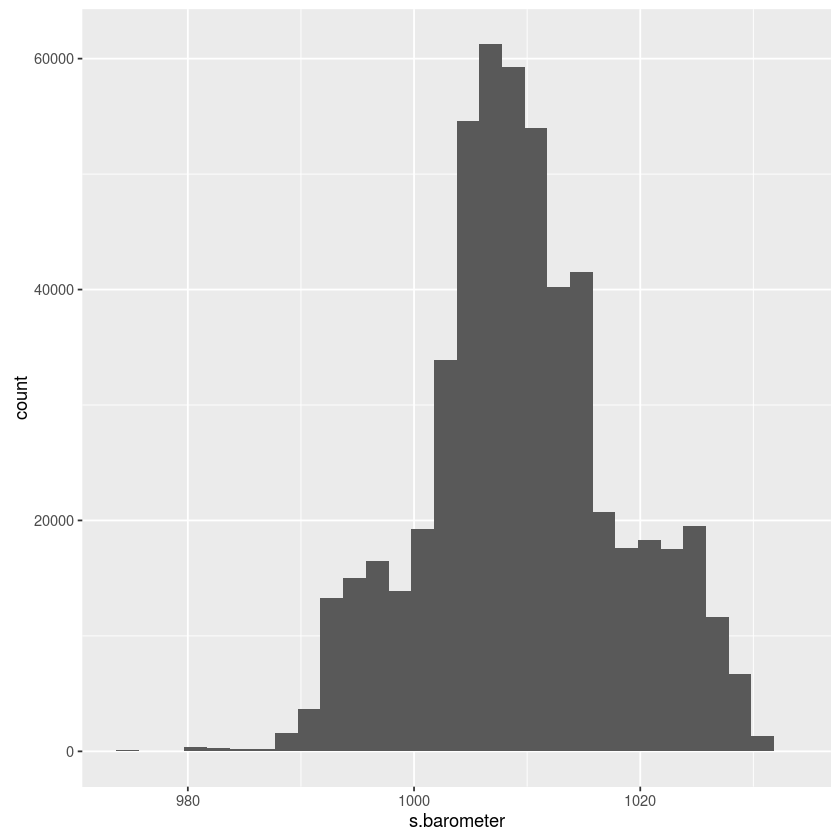

In [6]:
ggplot(df, aes(s.barometer)) + 
geom_histogram()

# CO2

Warning message:
“Removed 52 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

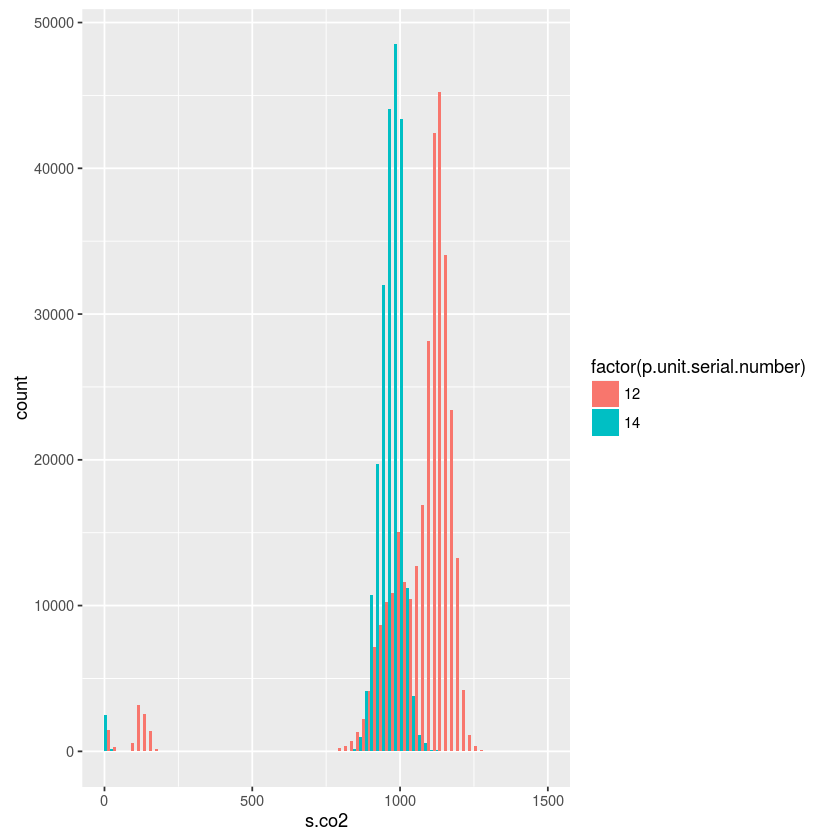

In [16]:
ggplot(df, aes(s.co2, fill = factor(p.unit.serial.number))) + 
geom_histogram(position = "dodge", binwidth = 20) +
xlim(0, 1500)

# Humidity

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


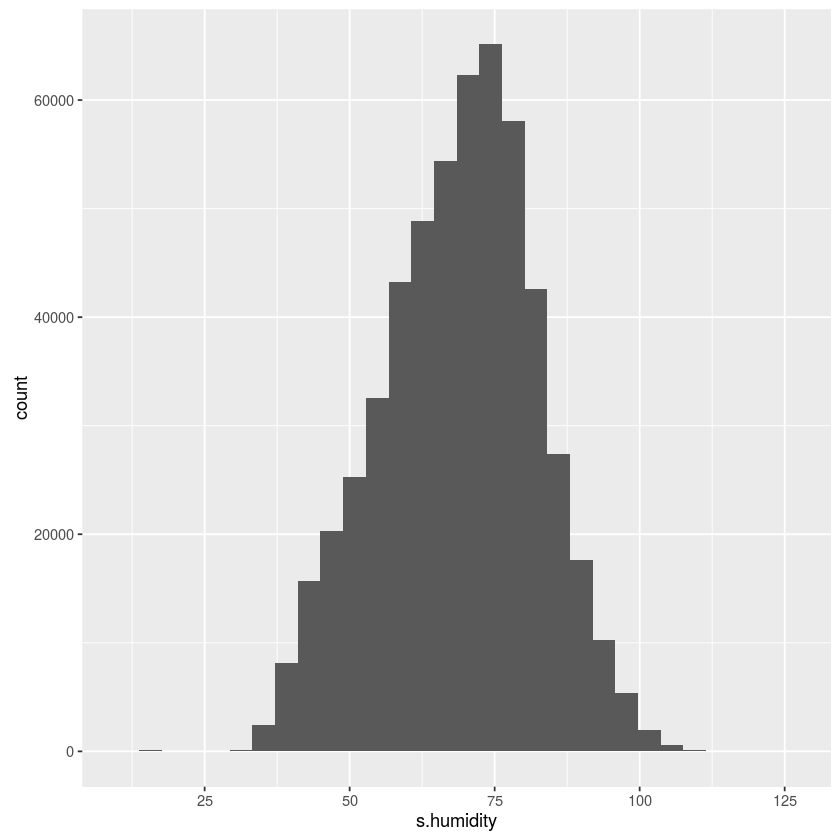

In [10]:
ggplot(df, aes(s.humidity)) + 
geom_histogram() 

# NO2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


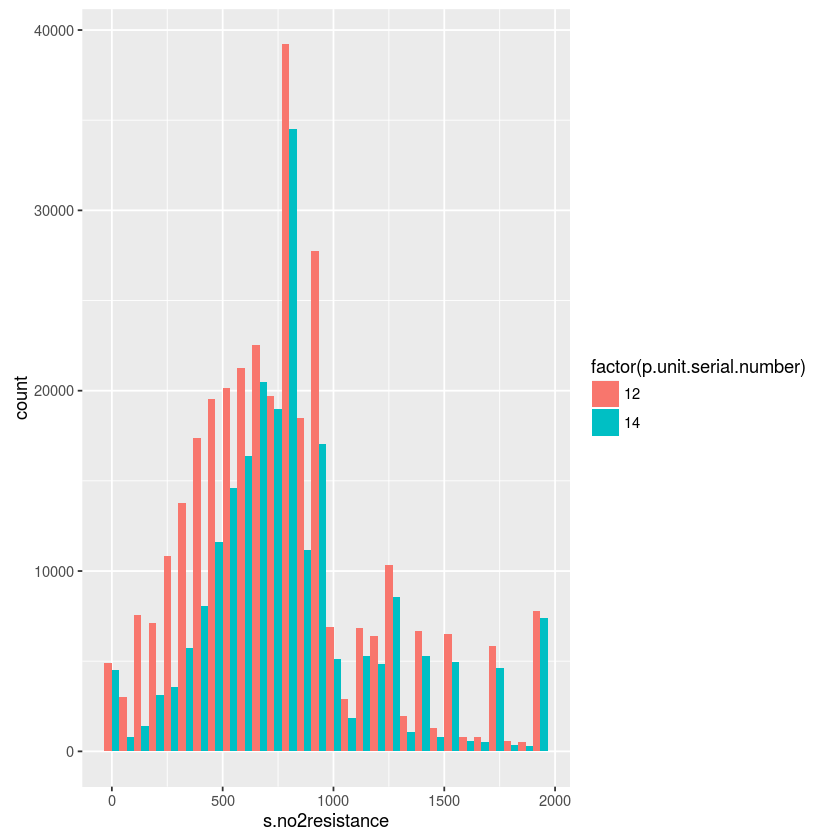

In [9]:
ggplot(df, aes(s.no2resistance, fill = factor(p.unit.serial.number))) + 
geom_histogram(position = "dodge") 

# O3

Warning message:
“Removed 248 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

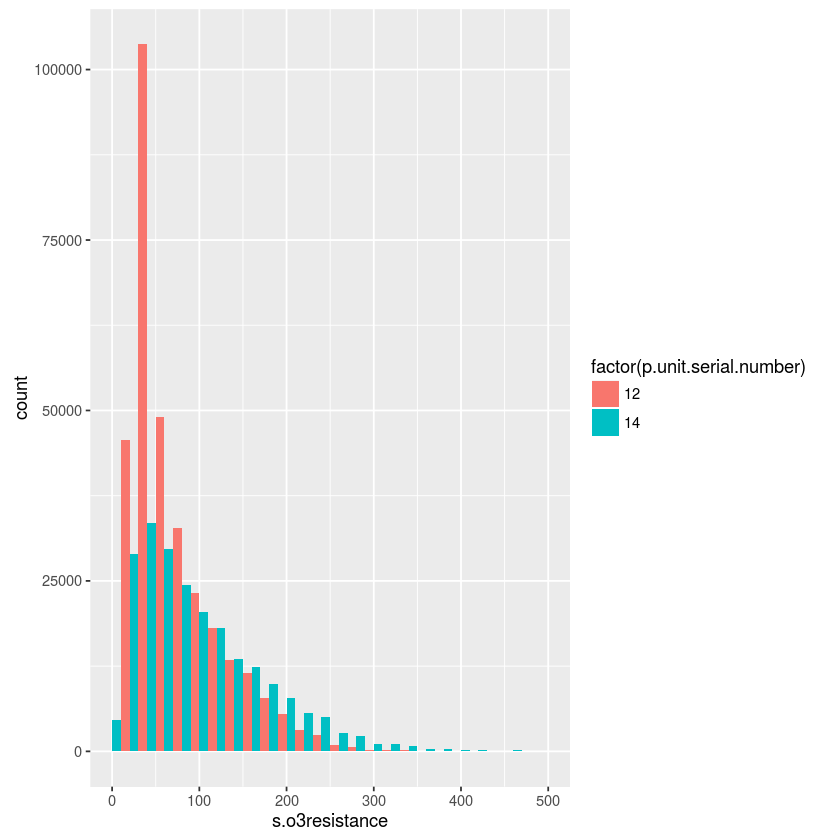

In [21]:
ggplot(df, aes(s.o3resistance, fill = factor(p.unit.serial.number))) + 
geom_histogram(position = 'dodge', binwidth = 20) + 
xlim(0, 500)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 234913 rows containing non-finite values (stat_bin).”

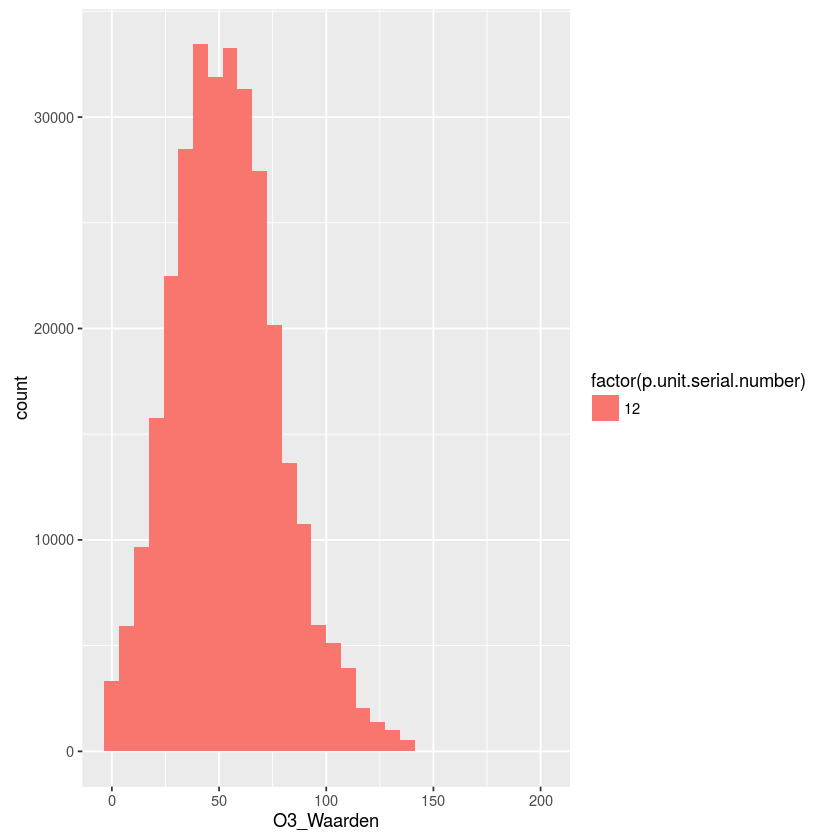

In [23]:
ggplot(df, aes(O3_Waarden, fill = factor(p.unit.serial.number))) + 
geom_histogram(position = 'dodge')

# Temperature ambient

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -4.187   5.625  11.940  11.750  16.690  43.880 

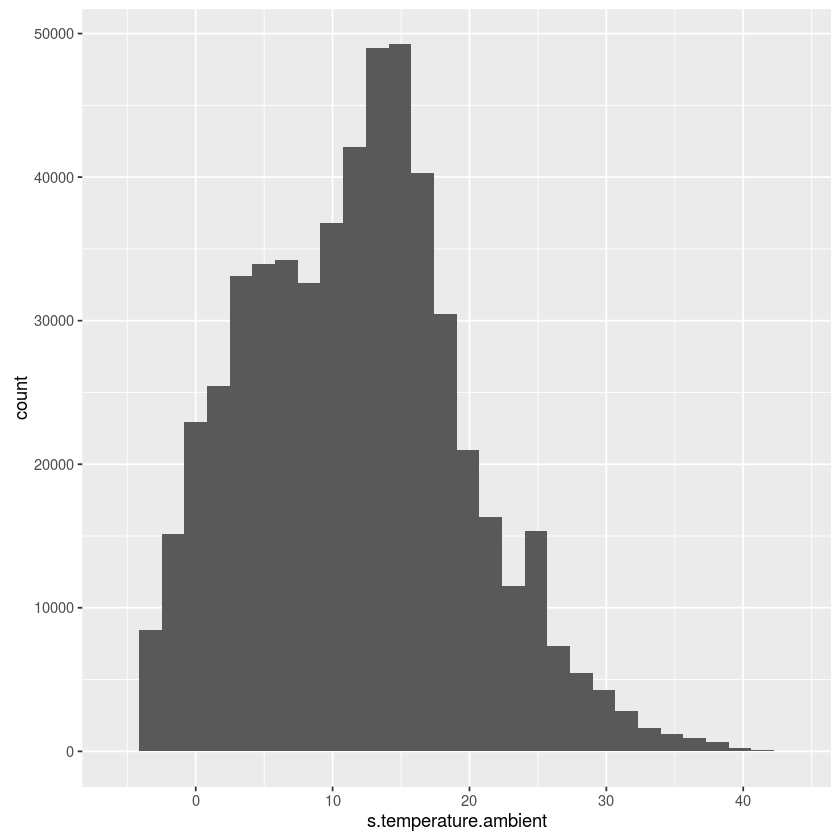

In [7]:
ggplot(df, aes(s.temperature.ambient)) + 
geom_histogram()
summary(df$s.temperature.ambient)

# Temperature unit

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


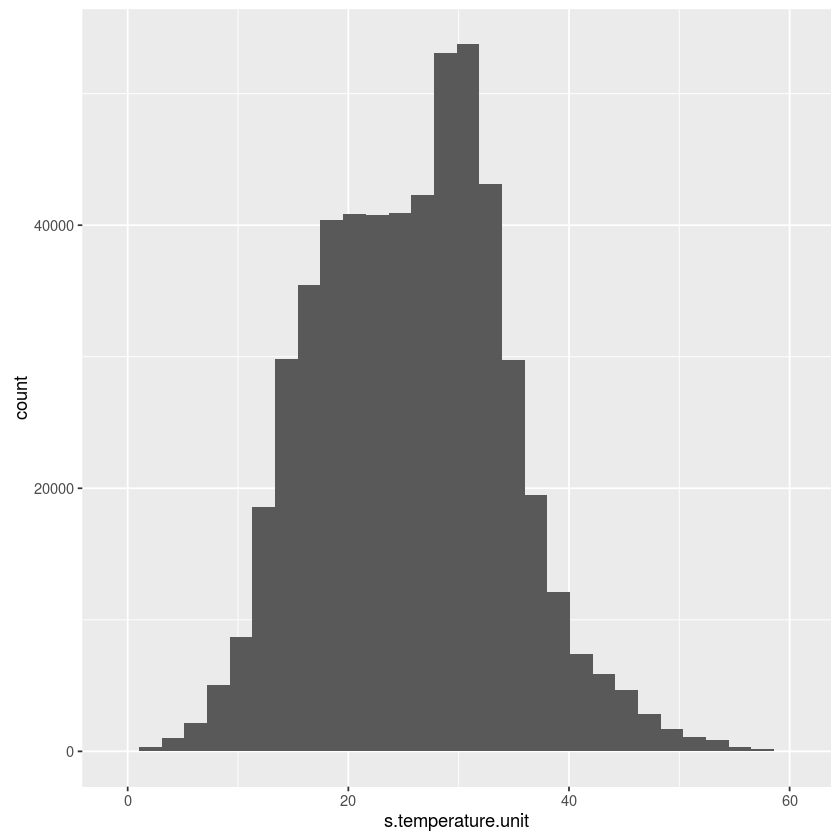

In [18]:
ggplot(df, aes(s.temperature.unit)) + 
geom_histogram() 